# Librerías

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

La siguiente tabla representa los datos semanales de escaneo minorista de 2018 para el volumen minorista Nacional (unidades) y el precio. Los datos de escaneo minorista provienen directamente de las cajas registradoras de los minoristas en base a las ventas minoristas reales de aguacates Hass. A partir de 2013, la tabla a continuación refleja un conjunto de datos minoristas ampliado y de múltiples puntos de venta. Los informes de múltiples puntos de venta incluyen una agregación de los siguientes canales: comestibles, masa, club, drogas, dólar y militar. El precio medio (de los aguacates) en la tabla refleja un coste por unidad (por aguacate), incluso cuando se venden múltiples unidades (aguacates) en bolsas. Los códigos de búsqueda de productos (PLU) de la tabla son sólo para aguacates Hass. Otras variedades de aguacates (por ejemplo, greenskins) no se incluyen en esta tabla.

* Date :La fecha de la observación
* AveragePrice : El precio medio de un aguacate individual
* Total Volume : Número total de aguacates vendidos
* 4046 : Número total de aguacates con PLU 4046 vendidos
* 4225 : Número total de aguacates con PLU 4225 vendidos
* 4770 : Número total de aguacates con PLU 4770 vendidos
* Total Bags : Número total de bolsas
* Small Bags : Número total de bolsas pequeñas
* Large Bags : Número total de bolsas grandes
* XLarge Bages : Bolsas extra grandes
* type : convencional o ecológico
* year : año de la fecha
* region : ciudad o región de la observación


In [3]:
# Cargar datos

df = pd.read_csv('../data/avocado.csv', usecols=lambda column: column != "Unnamed: 0")

In [4]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,"17,074.83","2,046.96","1,529.20",0.00,"13,498.67","13,066.82",431.85,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,"13,888.04","1,191.70","3,431.50",0.00,"9,264.84","8,940.04",324.80,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,"13,766.76","1,191.92","2,452.79",727.94,"9,394.11","9,351.80",42.31,0.00,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,"16,205.22","1,527.63","2,981.04",727.01,"10,969.54","10,919.54",50.00,0.00,organic,2018,WestTexNewMexico


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
# 1. Análisis de la estructura de datos

def analizar_estructura(df):
    print('Dimensiones del dataset:', df.shape)
    print('\nTipos de datos:')
    print(df.dtypes)
    print('\nValores faltantes:')
    print(df.isnull().sum())
    print('\nDuplicados:', df.duplicated().sum())

In [7]:
analizar_estructura(df)

Dimensiones del dataset: (18249, 13)

Tipos de datos:
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Valores faltantes:
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Duplicados: 0


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=True)
df.set_index('Date')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,"27,365.89","9,307.34","3,844.81",615.28,"13,598.46","13,061.10",537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,"17,723.17","1,189.35","15,628.27",0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,"2,896.72",161.68,206.96,0.00,"2,528.08","2,528.08",0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,"54,956.80","3,013.04","35,456.88","1,561.70","14,925.18","11,264.80","3,660.38",0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,"1,505.12",1.27,"1,129.50",0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,"908,202.13","142,681.06","463,136.28","174,975.75","127,409.04","103,579.41","22,467.04","1,362.59",conventional,2018,Chicago
2018-03-25,0.70,"9,010,588.32","3,999,735.71","966,589.50","30,130.82","4,014,132.29","3,398,569.92","546,409.74","69,152.63",conventional,2018,SouthCentral
2018-03-25,1.42,"163,496.70","29,253.30","5,080.04",0.00,"129,163.36","109,052.26","20,111.10",0.00,organic,2018,SouthCentral


In [9]:
# 2. Análisis descriptivo

def analisis_descriptivo(df):
    print(df.describe())
    print("\nFrecuencias de variables categóricas:")
    print(df['type'].value_counts())
    print(df['region'].value_counts())

In [10]:
analisis_descriptivo(df)

                                Date  AveragePrice  Total Volume  \
count                          18249     18,249.00     18,249.00   
mean   2016-08-13 23:30:43.498273792          1.41    850,644.01   
min              2015-01-04 00:00:00          0.44         84.56   
25%              2015-10-25 00:00:00          1.10     10,838.58   
50%              2016-08-14 00:00:00          1.37    107,376.76   
75%              2017-06-04 00:00:00          1.66    432,962.29   
max              2018-03-25 00:00:00          3.25 62,505,646.52   
std                              NaN          0.40  3,453,545.36   

               4046          4225         4770    Total Bags    Small Bags  \
count     18,249.00     18,249.00    18,249.00     18,249.00     18,249.00   
mean     293,008.42    295,154.57    22,839.74    239,639.20    182,194.69   
min            0.00          0.00         0.00          0.00          0.00   
25%          854.07      3,008.78         0.00      5,088.64      2,849.42 

In [11]:
ciudades_principales = [
    "NewYork",
    "Chicago",
    "LosAngeles",
    "MiamiFtLauderdale",
    "Houston",
    "SanFrancisco"
]

total_us = ['TotalUS']


In [12]:
# 3. Análisis temporal

In [13]:
# Relación precio - cantidad

def grafico_doble_eje(df, cities, column_type='type', column_city='region', column_price='AveragePrice', column_quantity='Total Volume'):
    # Obtener los tipos únicos en la columna type
    tipos = df[column_type].unique()
    
    for tipo in tipos:
        for city in cities:
    
            # Filtrar el df por el tipo y la ciudad
            df_filtrado = df[(df[column_type] == tipo) & (df[column_city] == city)]
    
            # Crear el gráfico
            fig = go.Figure()
    
            # Agregar la línea para los precios en el eje Y1
            fig.add_trace(go.Scatter(
                x=df_filtrado['Date'],
                y=df_filtrado[column_price],
                name=f'{column_price} ({tipo} - {city})',
                mode='lines',
                yaxis='y1'
            ))
            
            # Agregar la linea para las cantidades en el eje Y2
            fig.add_trace(go.Scatter(
                x=df_filtrado['Date'],
                y=df_filtrado[column_quantity],
                name=f'{column_quantity} ({tipo} - {city})',
                mode='lines',
                yaxis='y2'
            ))
            
            # Actualizar el layout del gráfico para mostrar los 2 ejes Y
            fig.update_layout(
                title=f'{tipo} - {city}: Price and Quantity Over Time',
                xaxis_title='Date',
                yaxis=dict(
                    title=f'{column_price}',
                    titlefont=dict(color='blue'),
                    tickfont=dict(color='blue')
                ),
                yaxis2=dict(
                    title=f'{column_quantity}',
                    titlefont=dict(color='red'),
                    tickfont=dict(color='red'),
                    overlaying='y',
                    side='right'
                ),
                legend=dict(x=0, y=1.1),
                hovermode='x unified'
            )
            
            fig.show()

In [14]:
grafico_doble_eje(df, total_us)

In [15]:
grafico_doble_eje(df, ciudades_principales)

In [18]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,"27,365.89","9,307.34","3,844.81",615.28,"13,598.46","13,061.10",537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,"17,723.17","1,189.35","15,628.27",0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,"2,896.72",161.68,206.96,0.00,"2,528.08","2,528.08",0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,"54,956.80","3,013.04","35,456.88","1,561.70","14,925.18","11,264.80","3,660.38",0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,"1,505.12",1.27,"1,129.50",0.00,374.35,186.67,187.68,0.00,organic,2015,Boise


In [19]:
# Correlación cruzada

def correlacion_cruzada(df, cities, column_type='type', column_city='region', column_price='AveragePrice', column_volume='Total Volume'):
    """
    Realiza un análisis de correlación cruzada entre AveragePrice y Total Volume, diferenciando por ciudades y categorías.
    
    Args:
    df (pd.DataFrame): DataFrame con los datos. El índice debe ser la columna de fechas.
    cities (list): Lista de ciudades a incluir en el análisis.
    column_type (str): Nombre de la columna que contiene las categorías de tipo.
    column_city (str): Nombre de la columna que contiene las ciudades.
    column_price (str): Nombre de la columna que contiene los precios (AveragePrice).
    column_volume (str): Nombre de la columna que contiene el volumen (Total Volume).
    
    Returns:
    None
    """
    
    # Obtener los tipos únicos en la columna 'type'
    tipos = df[column_type].unique()
    
    for tipo in tipos:
        for city in cities:
            # Filtrar el DF por el tipo y la ciudad
            df_filtrado = df[(df[column_type] == tipo) & (df[column_city] == city)]
            
            # Extraer las dos series a analizar
            series_price = df_filtrado[column_price].values
            series_volume = df_filtrado[column_volume].values
            
            # Calcular la correlación cruzada
            ccf_values = ccf(series_price, series_volume, adjusted=False)
            
            # Crear el gráfico de correlación cruzada
            plt.figure(figsize=(10,6))
            plt.bar(range(len(ccf_values)), ccf_values, width=0.5)
            plt.title(f'Correlación Cruzada - {tipo} - {city}')
            plt.xlabel('Lag')
            plt.ylabel('Correlación')
            plt.grid(True)
            plt.show()

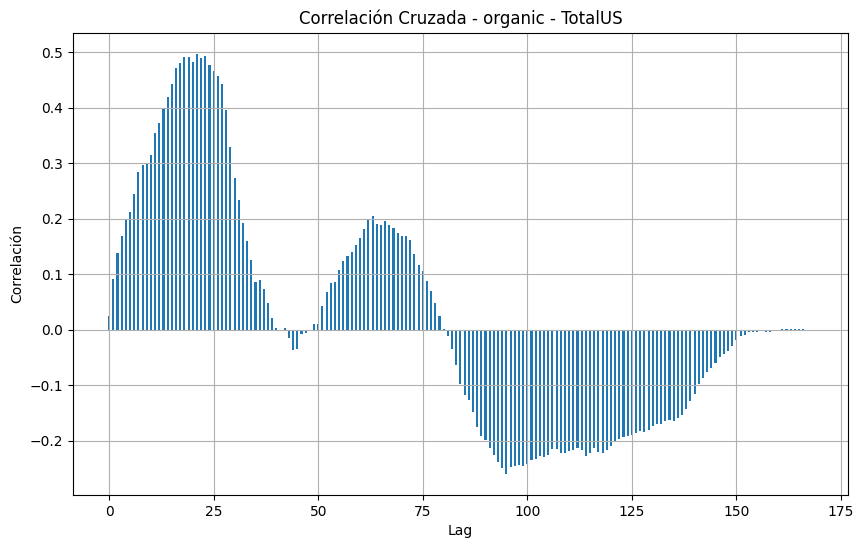

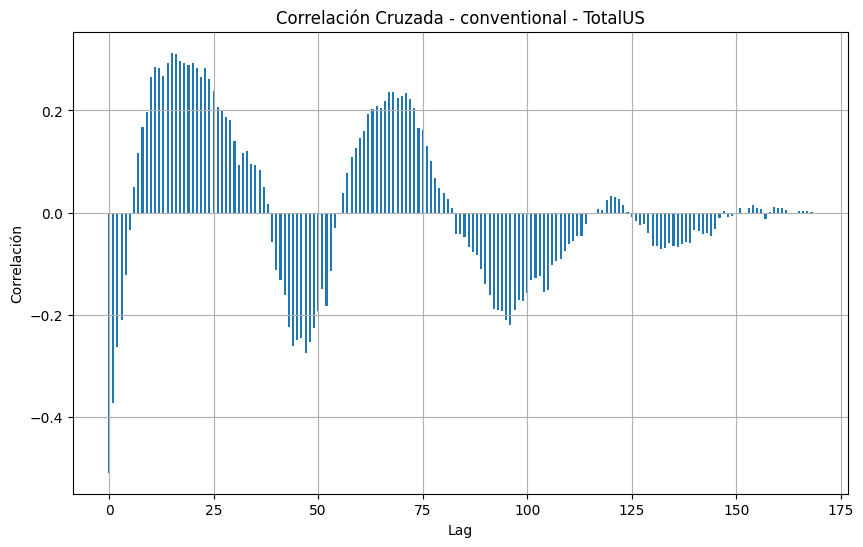

In [20]:
correlacion_cruzada(df, total_us)

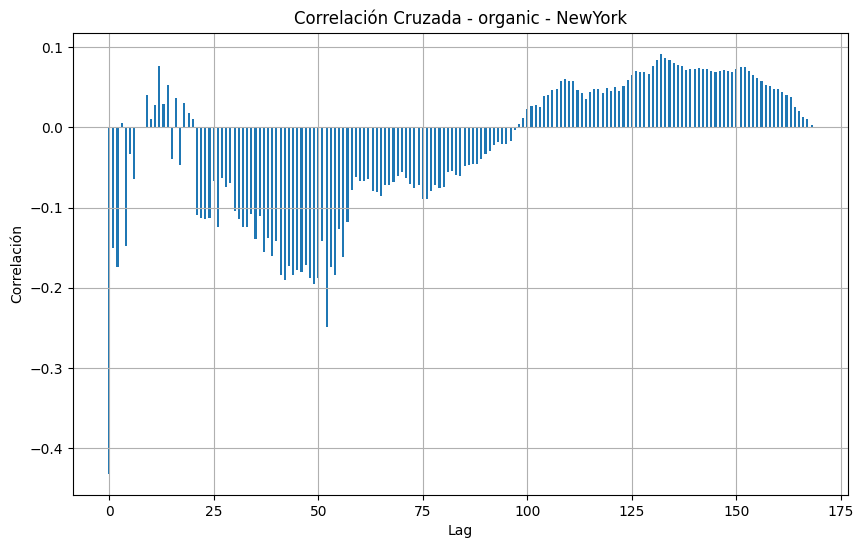

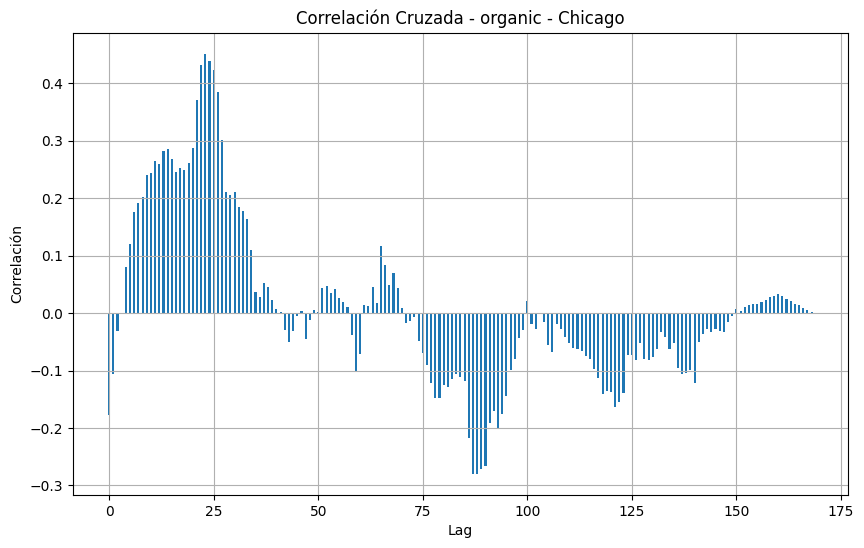

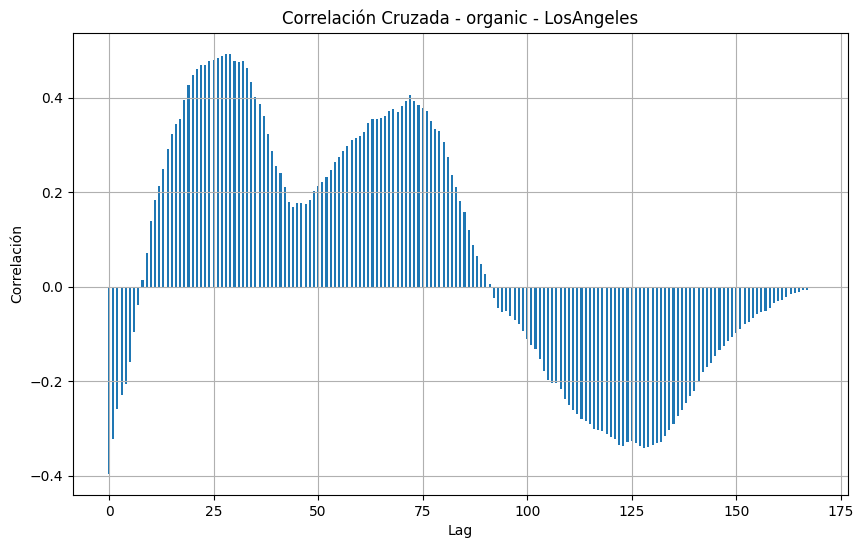

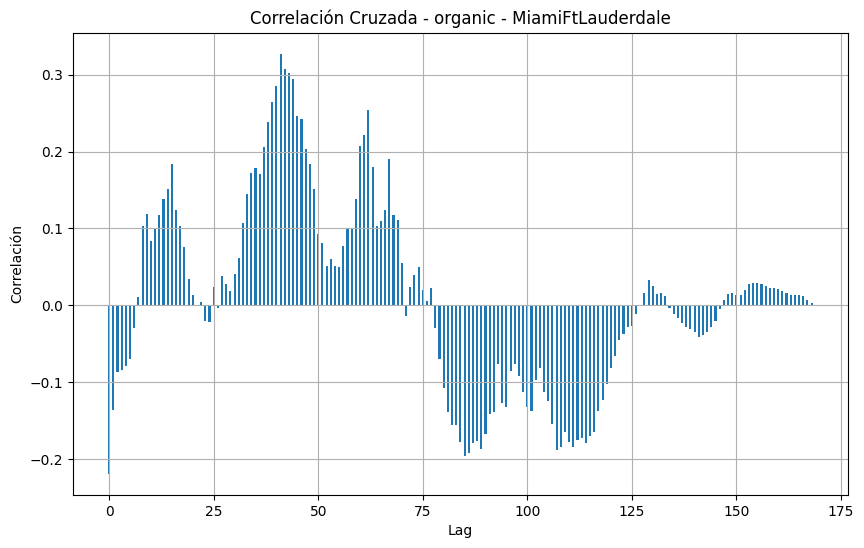

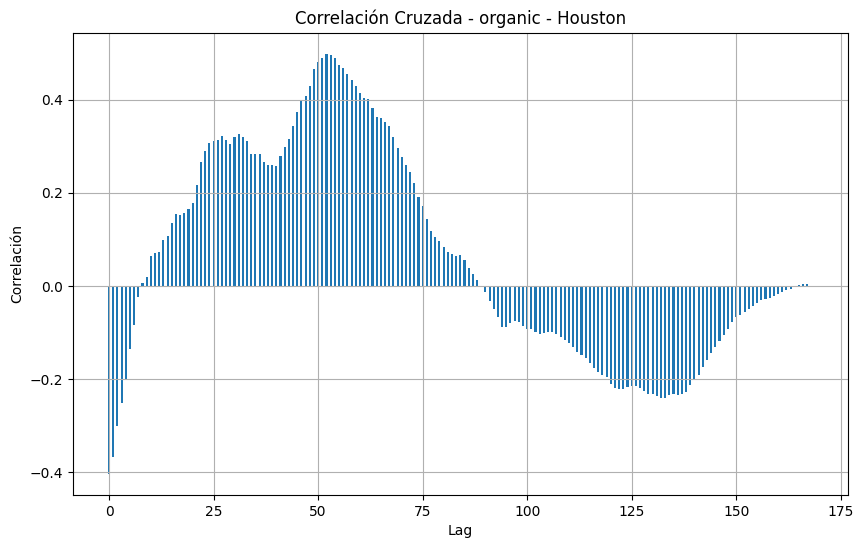

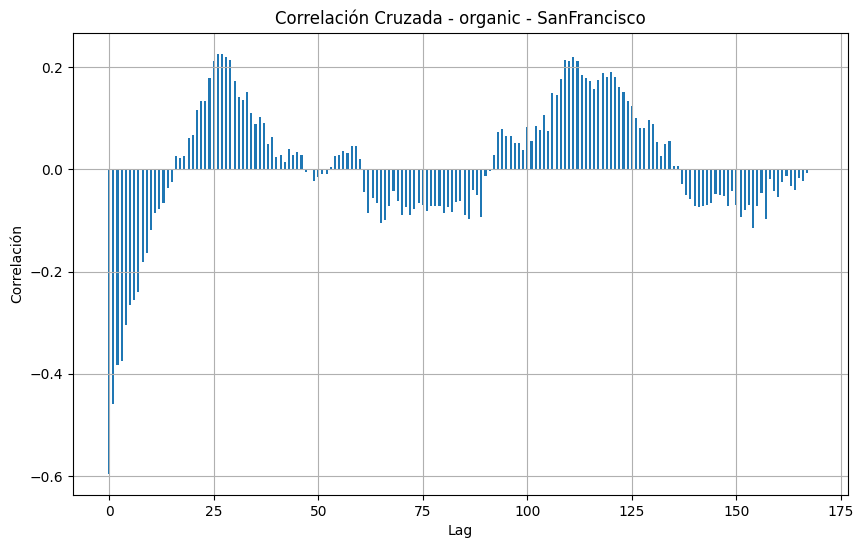

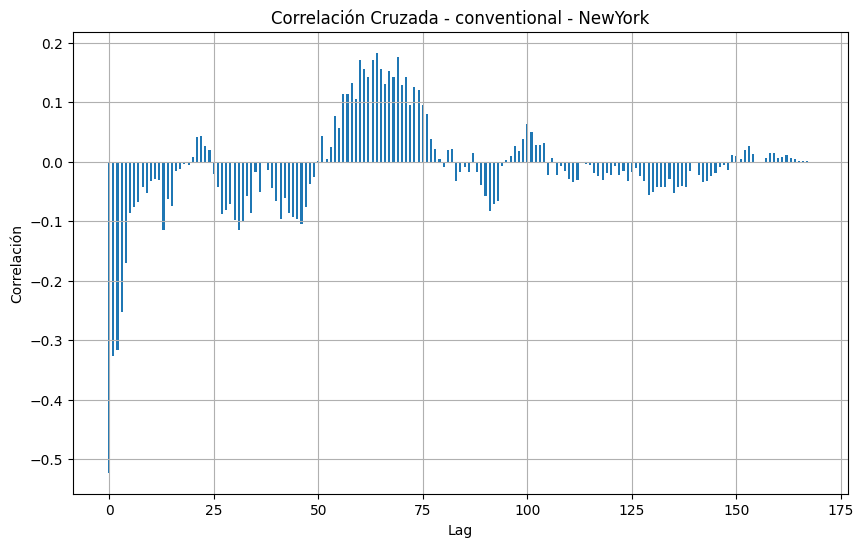

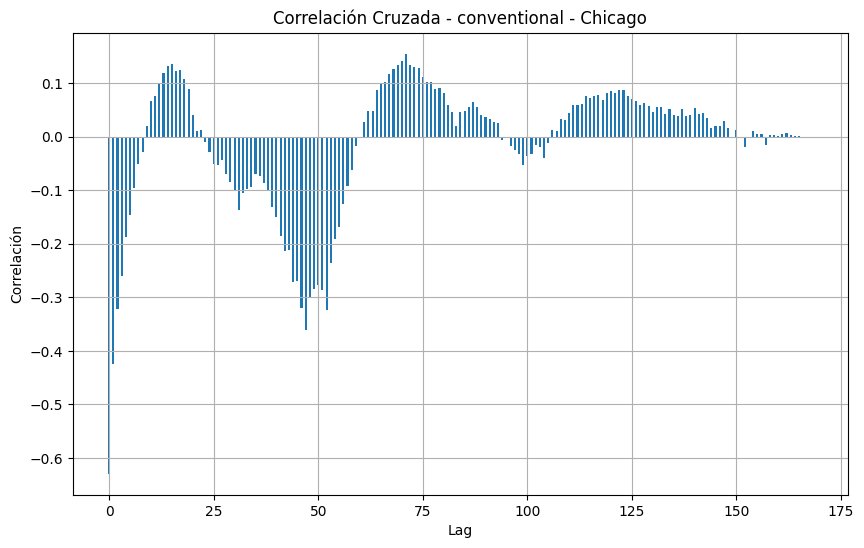

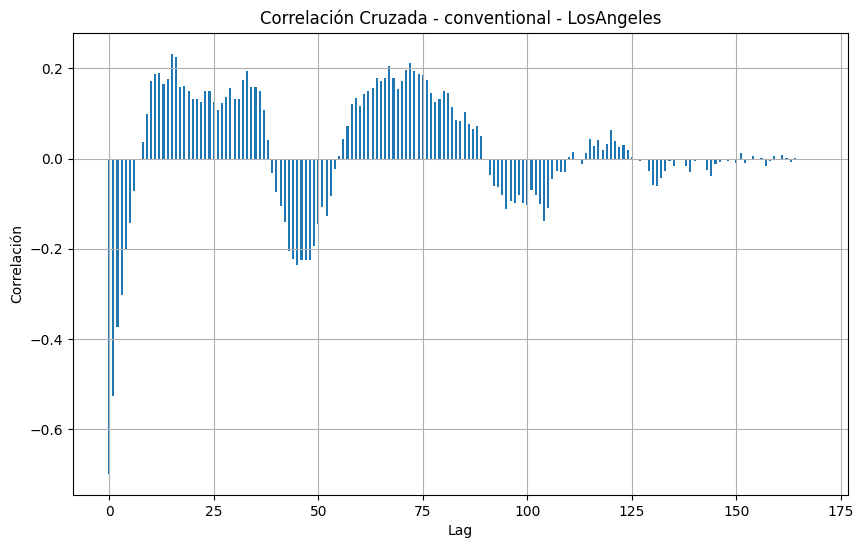

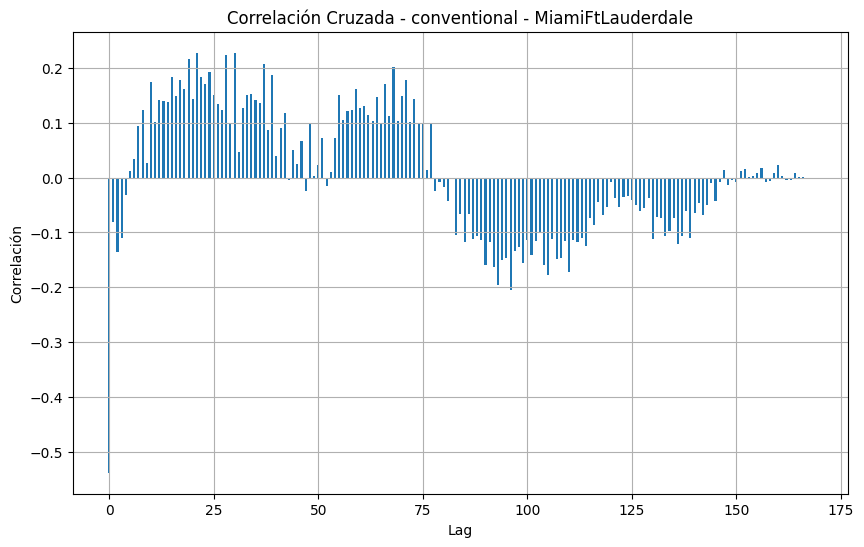

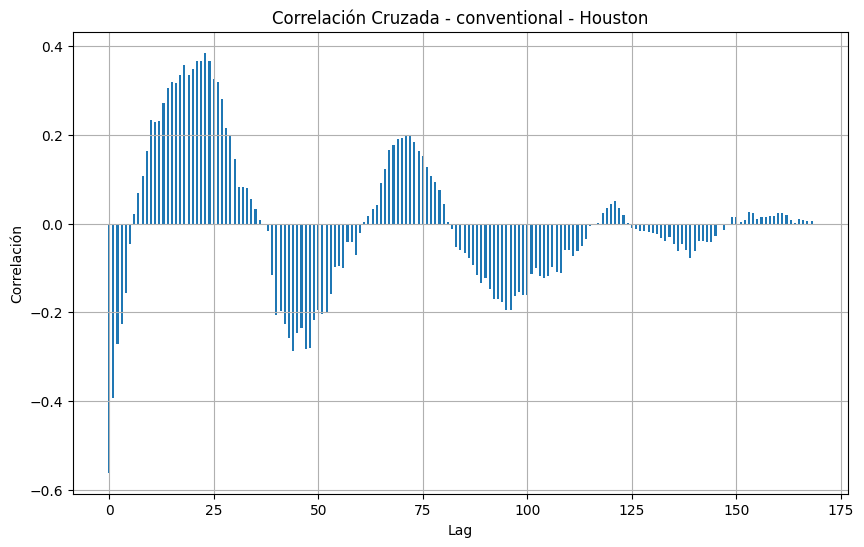

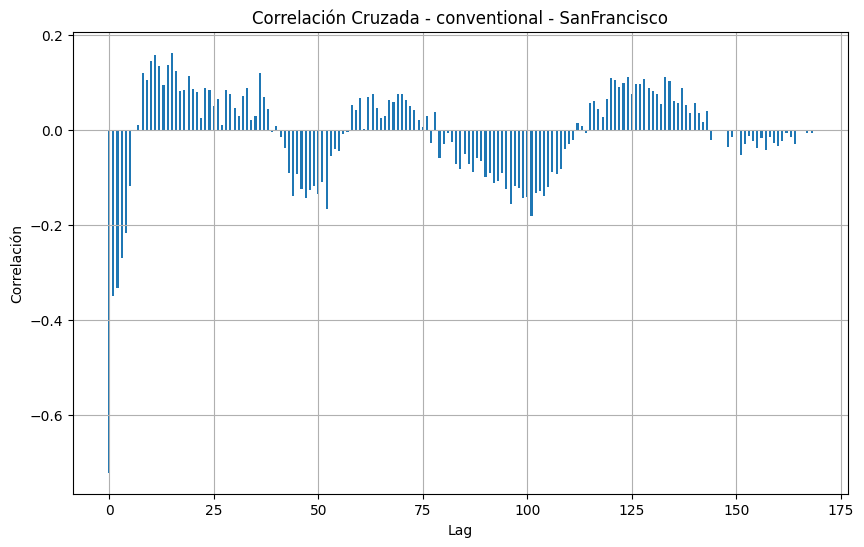

In [21]:
correlacion_cruzada(df, ciudades_principales)

In [22]:
# Matriz de Correlación

def graficar_matriz_correlacion(df, cities, column_type='type', column_city='region', columns_to_correlate=['AveragePrice', 'Total Volume']):
    """
    Grafica una matriz de correlación entre columnas específicas, distinguiendo entre tipos y ciudades.
    
    Args:
    df (pd.DataFrame): DataFrame con los datos.
    cities (list): Lista de ciudades a incluir en los gráficos.
    column_type (str): Nombre de la columna que contiene las categorías de tipo.
    column_city (str): Nombre de la columna que contiene las ciudades.
    columns_to_correlate (list): Lista de columnas entre las cuales calcular la correlación.
    
    Returns:
    None
    """
    
    # Obtener los tipos únicos en la columna 'type'
    tipos = df[column_type].unique()
    
    for tipo in tipos:
        for city in cities:
            
            # Filtrar el DF por el tipo y la ciudad
            df_filtrado = df[(df[column_type] == tipo) & (df[column_city] == city)]
            
            # Calcular la matriz de correlación
            correlacion = df_filtrado[columns_to_correlate].corr()
            
            # Crear el heatmap de la matriz de correlación
            plt.figure(figsize=(8,6))
            sns.heatmap(correlacion, annot=True, cmap='Blues')
            plt.title(f'Matriz de correlación - {tipo} - {city}')
            plt.show()
    
    

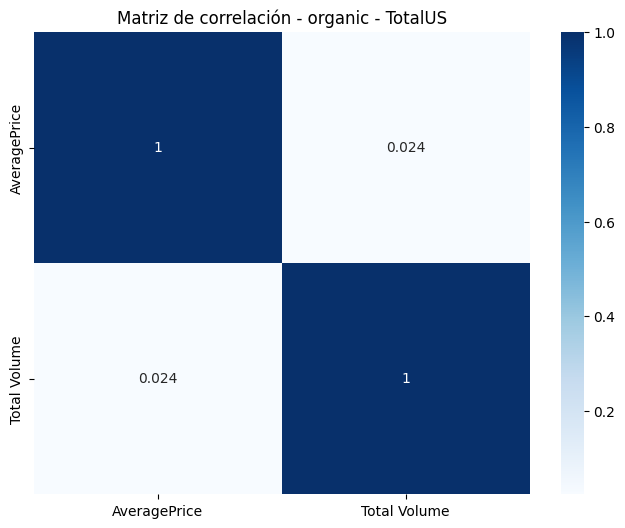

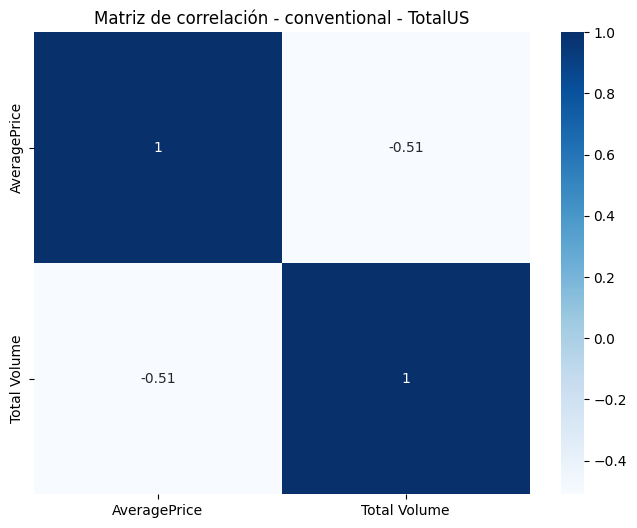

In [23]:
graficar_matriz_correlacion(df, total_us)

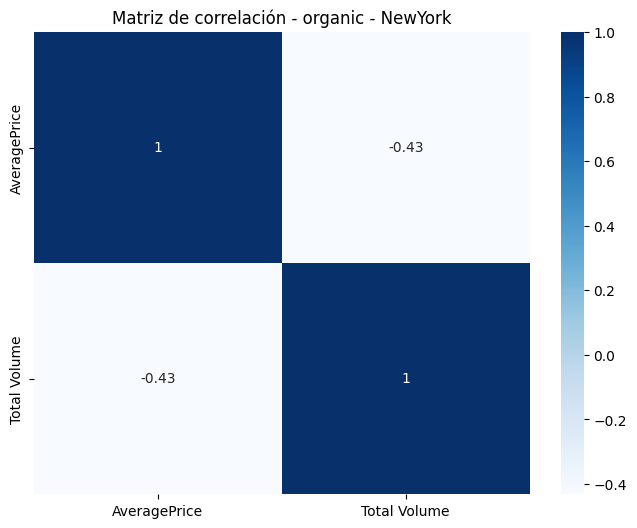

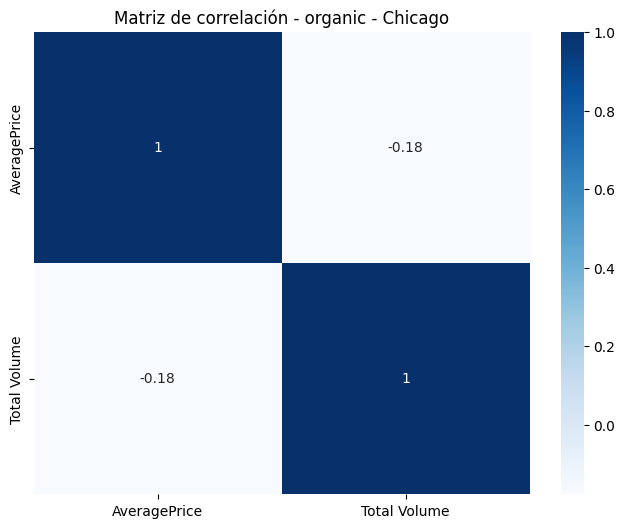

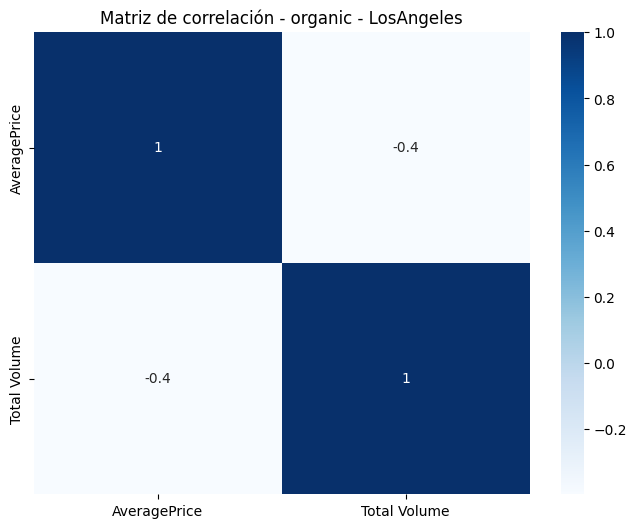

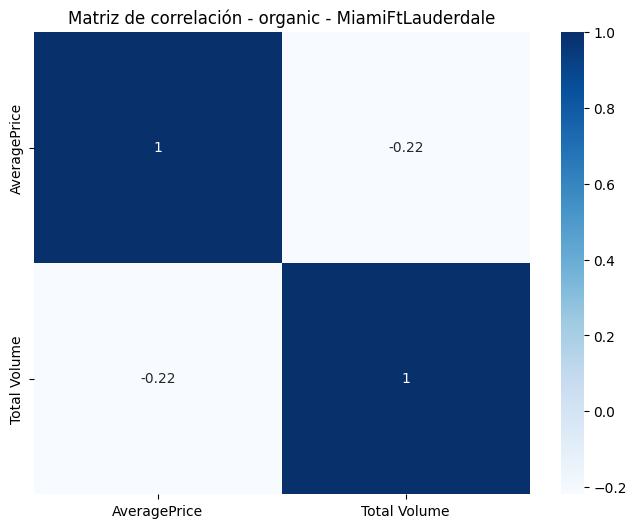

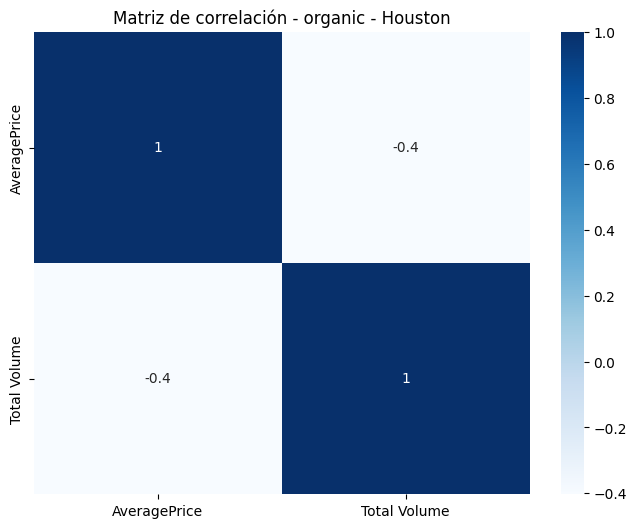

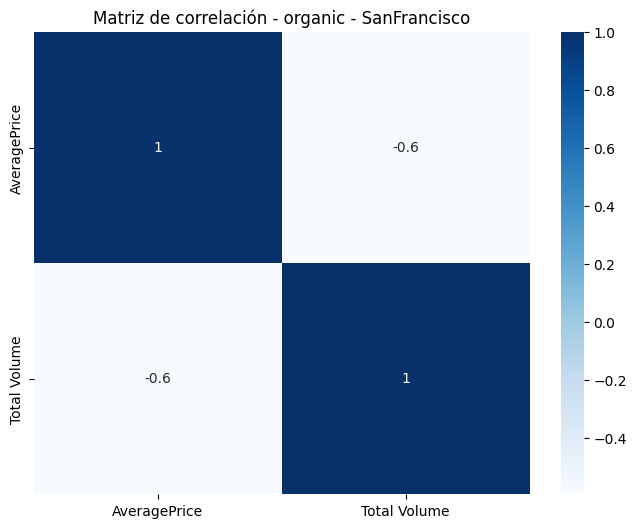

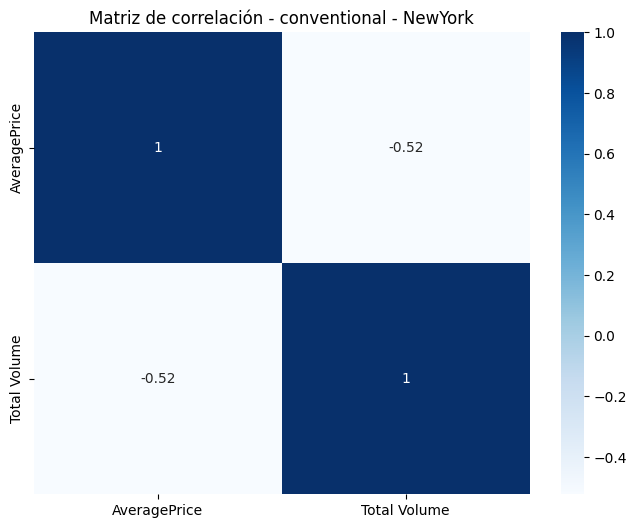

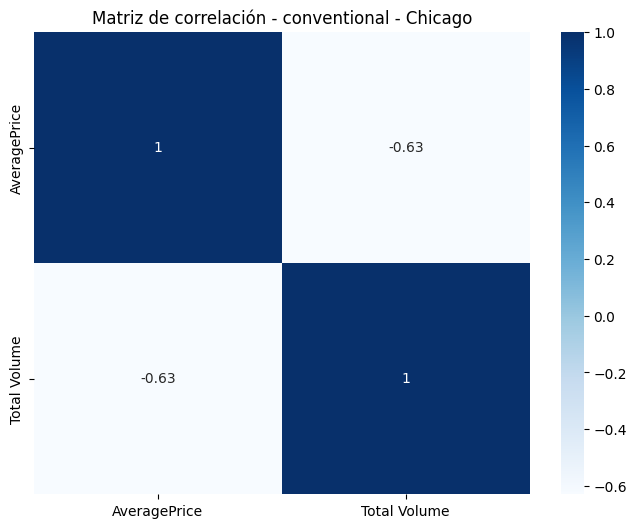

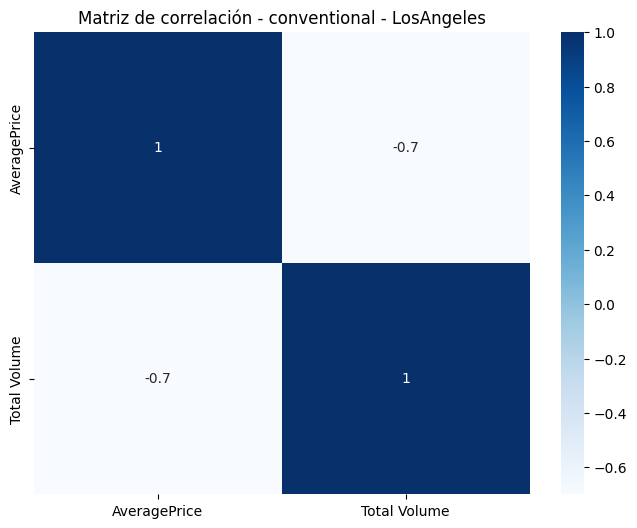

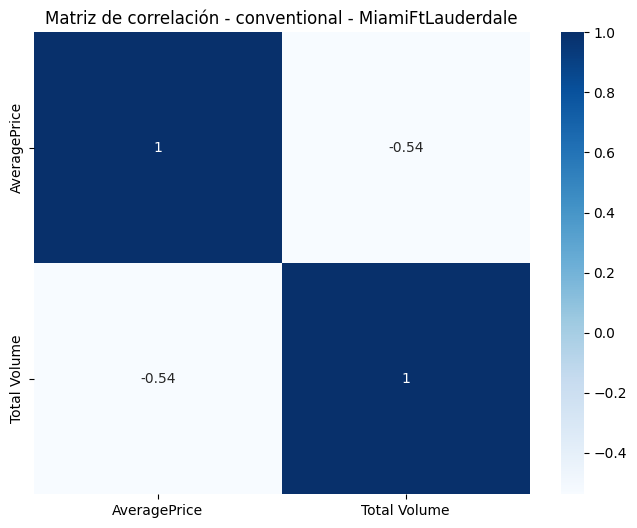

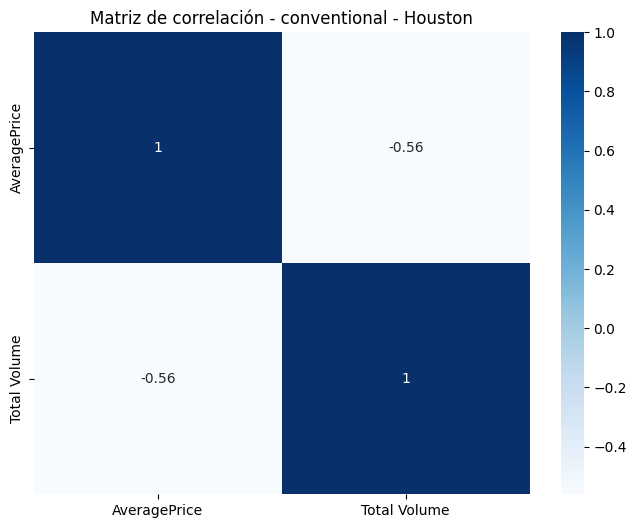

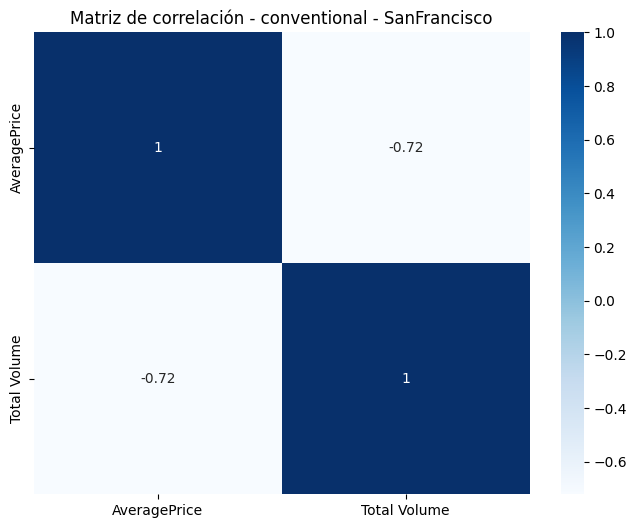

In [24]:
graficar_matriz_correlacion(df, ciudades_principales)

In [56]:
# Distribución de precios y cantidades

def graficar_histograma(df, cities, column_type='type', column_city='region',column_price='AveragePrice', column_volume='Total Volume'):
    """
    Grafica un histograma conjunto (histplot) para las columnas AveragePrice y Total Volume, diferenciando entre tipo y ciudad.
    
    Args:
    df (pd.DataFrame): DataFrame con los datos.
    cities (list): Lista de ciudades a incluir en los gráficos.
    column_type (str): Nombre de la columna que contiene las categorías de tipo.
    column_city (str): Nombre de la columna que contiene las ciudades.
    column_price (str): Nombre de la columna que contiene los precios (AveragePrice).
    column_volume (str): Nombre de la columna que contiene los volúmenes (Total Volume).
    
    Returns:
    None
    """
    
    # Obtener los tipos únicos en la columna 'type'
    tipos = df[column_type].unique()
    
    for tipo in tipos:
        for city in cities:
            # Filtrar el DataFrame por el tipo y la ciudad
            df_filtrado = df[(df[column_type] == tipo) & (df[column_city] == city)]
            
            # Crear la figura con dos subplots, una para cada variable
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

            # Graficar el histograma para AveragePrice en el primer subplot
            sns.histplot(df_filtrado[column_price], kde=True, color='blue', ax=ax1, bins=20)
            ax1.set_title(f'Distribución de {column_price}')
            ax1.set_xlabel('Value')
            ax1.set_ylabel('Frecuencia')
            ax1.grid(True)

            # Graficar el histograma para Total Volume en el segundo subplot
            sns.histplot(df_filtrado[column_volume], kde=True, color='red', ax=ax2, bins=20)
            ax2.set_title(f'Distribución de {column_volume}')
            ax2.set_xlabel('Value')
            ax2.set_ylabel('Frecuencia')
            ax2.grid(True)

            # Título principal del gráfico
            plt.suptitle(f'Distribuciones de {column_price} y {column_volume} - {tipo} - {city}', fontsize=16)

            # Ajustar espaciado para que no se superpongan los gráficos
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            
            

            # Mostrar el gráfico
            plt.show()

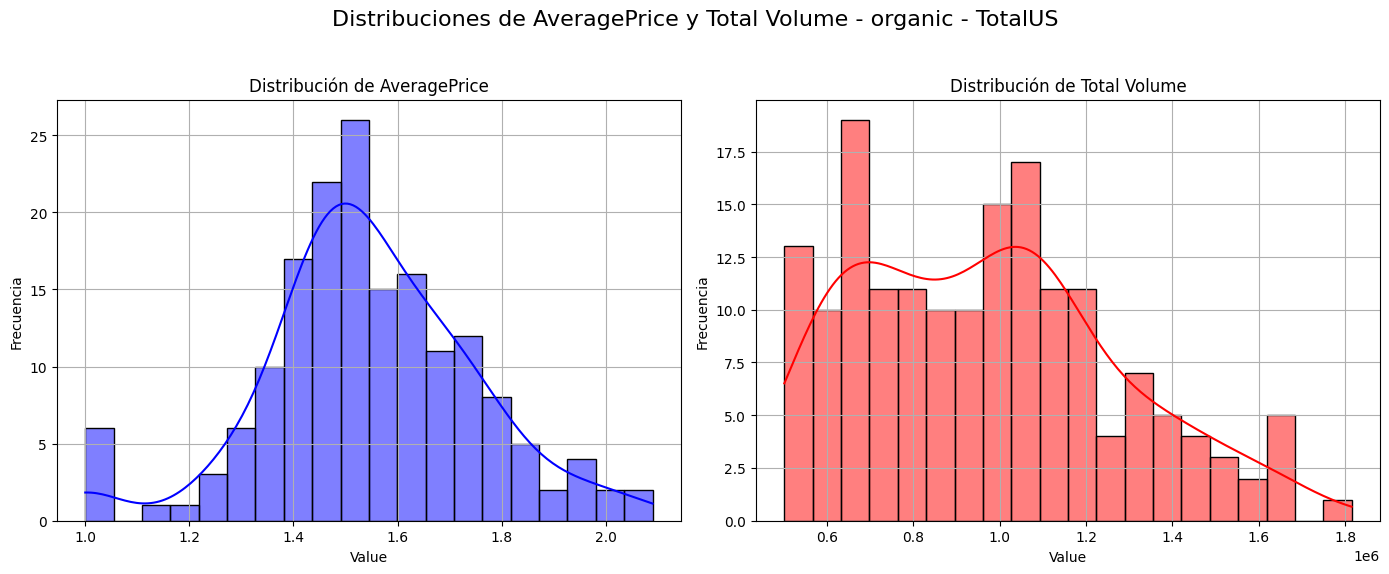

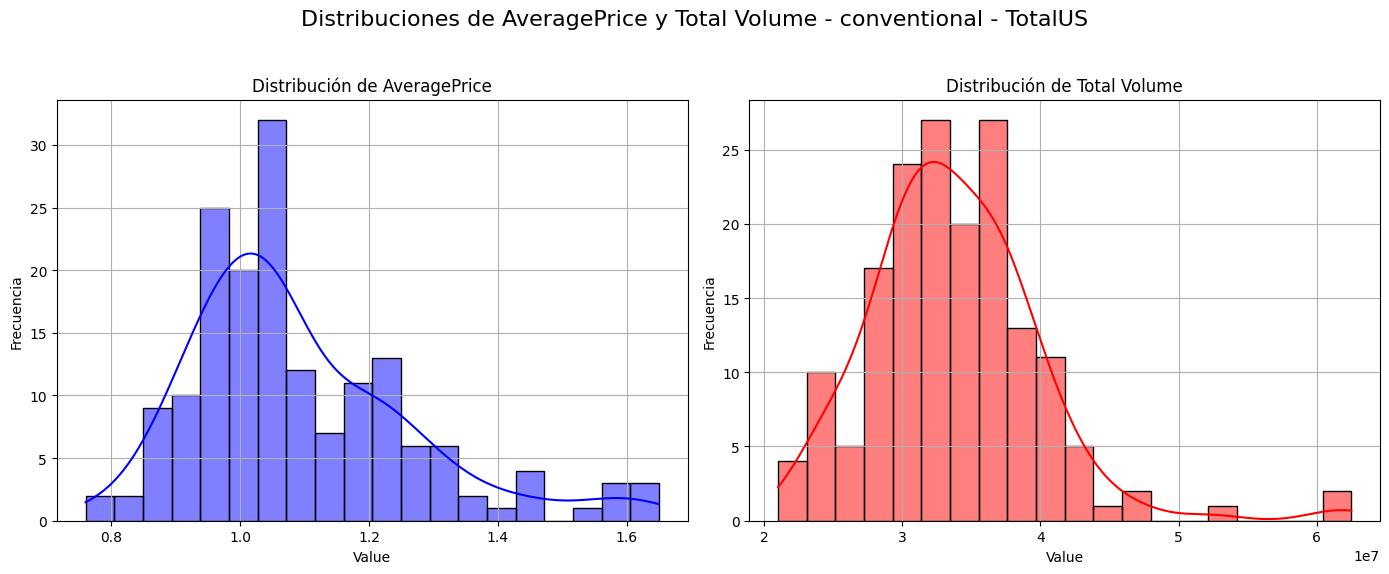

In [57]:
graficar_histograma(df, total_us)

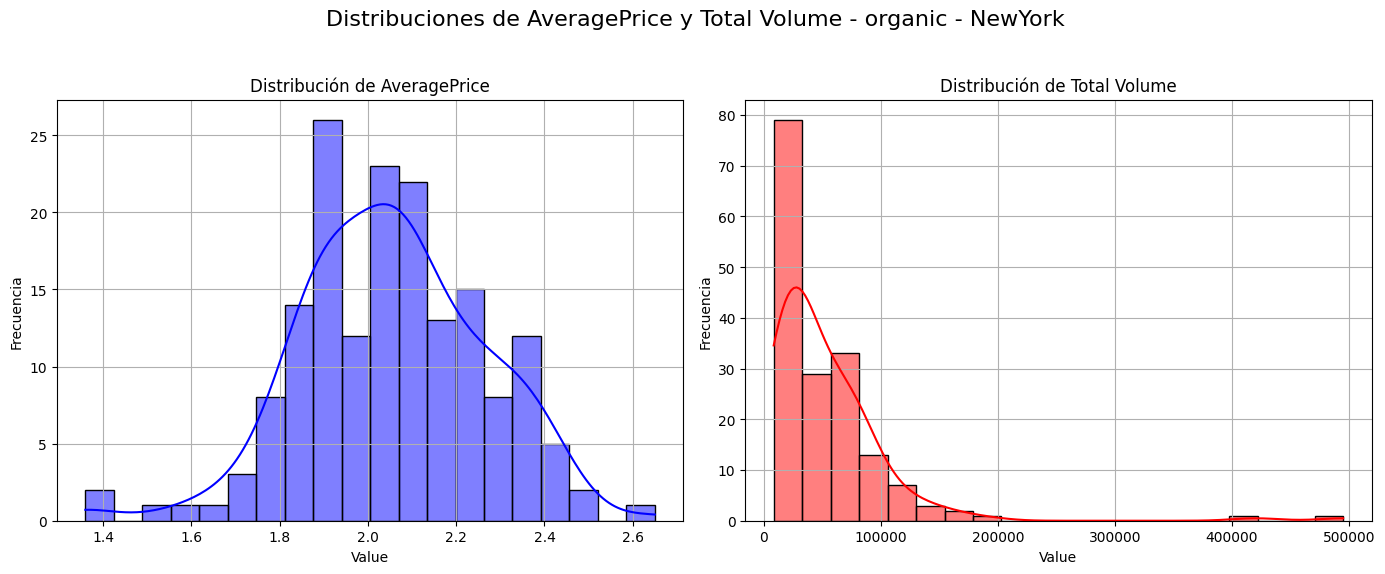

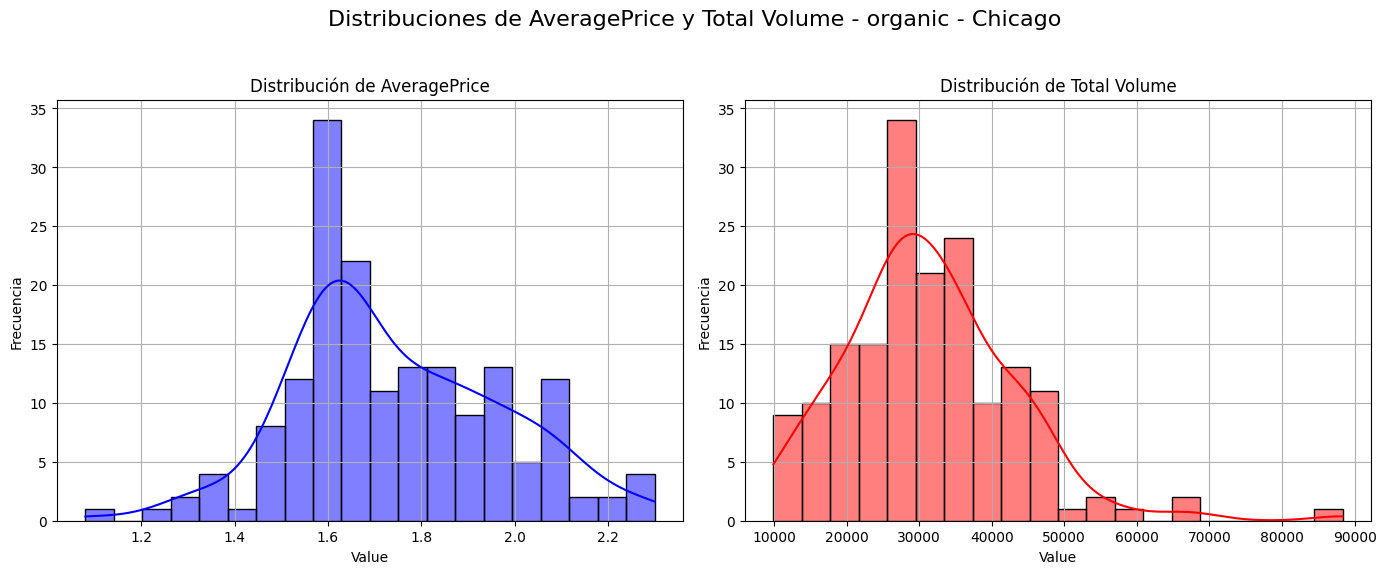

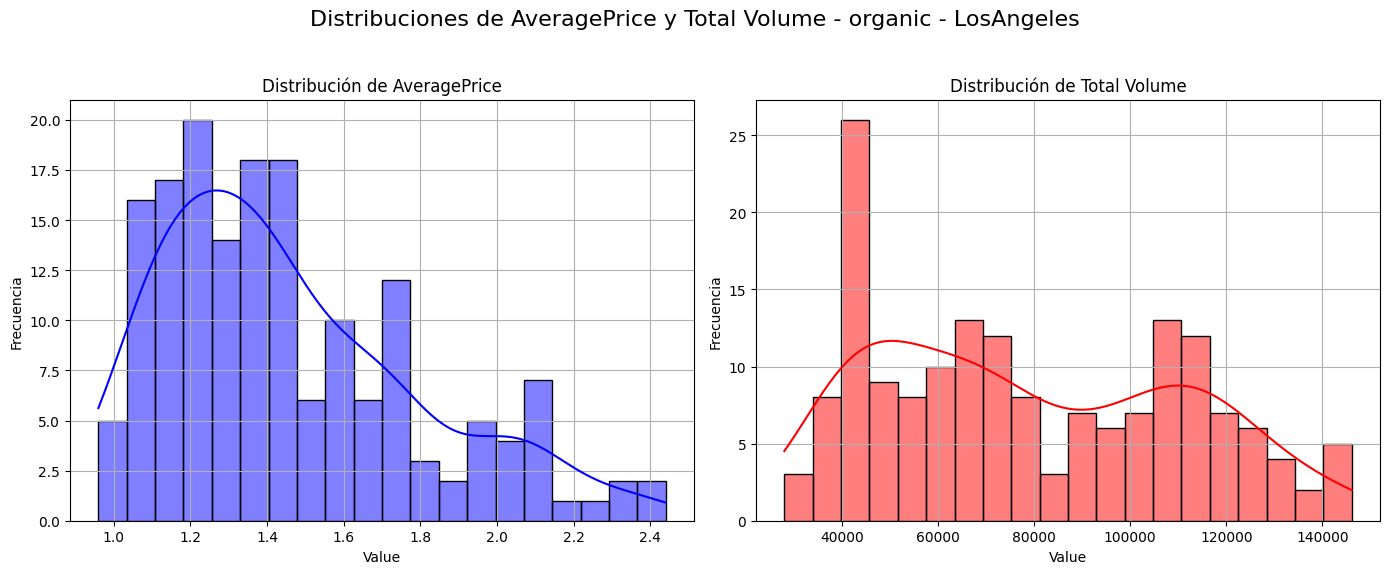

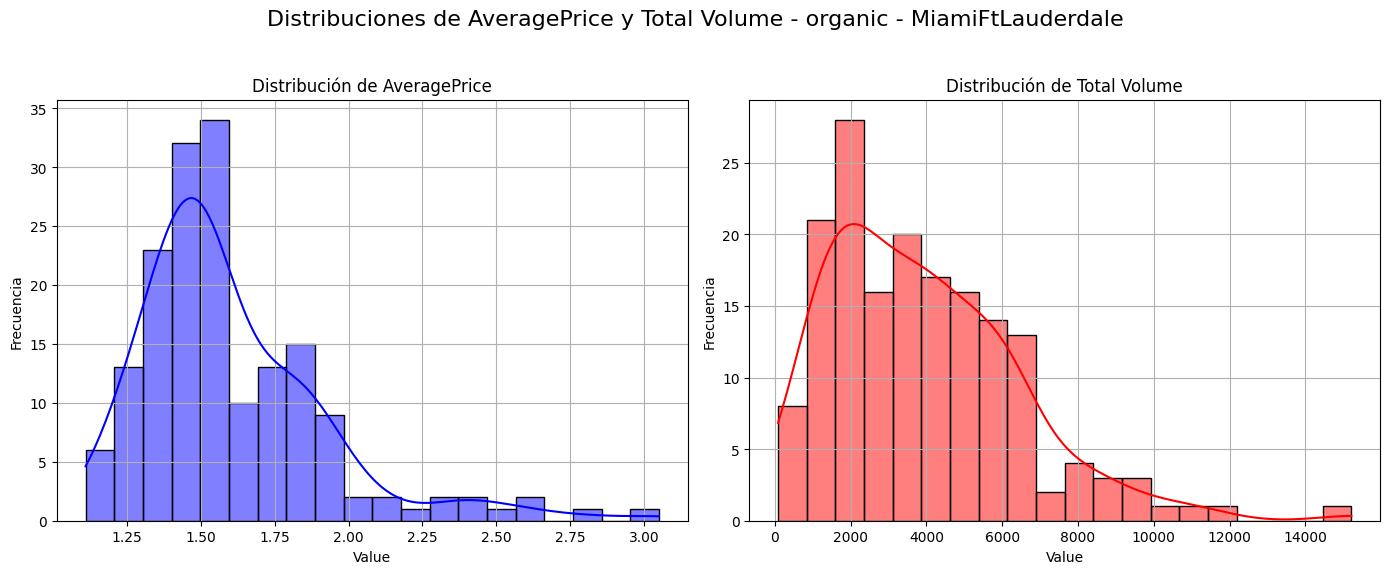

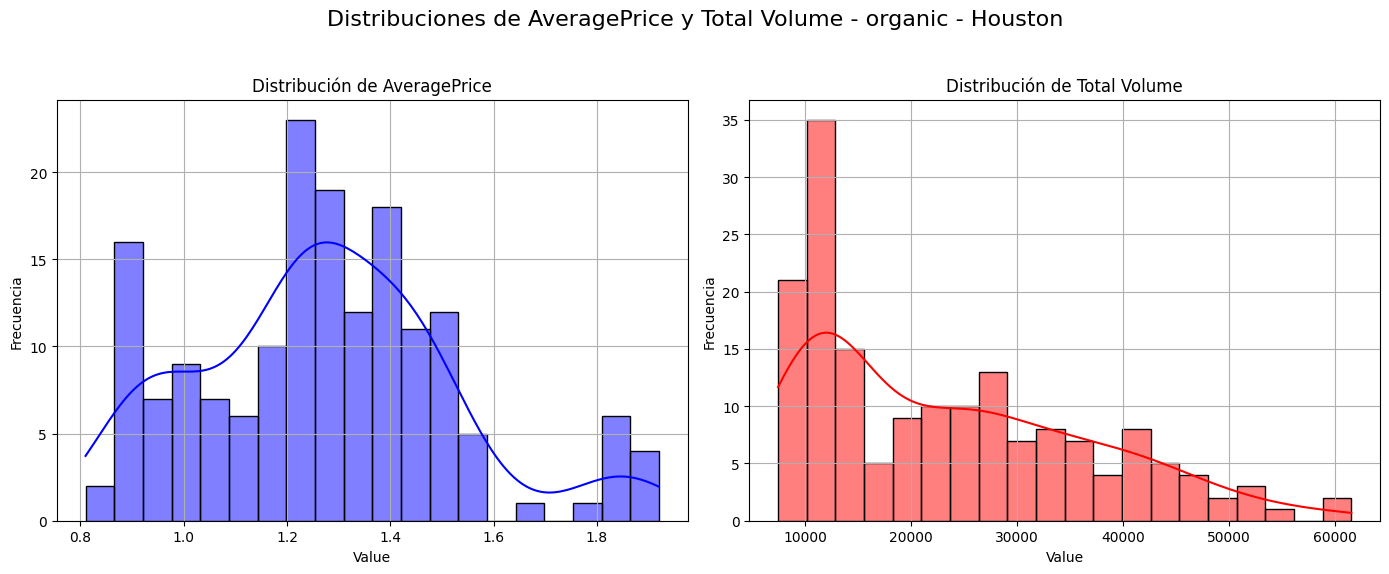

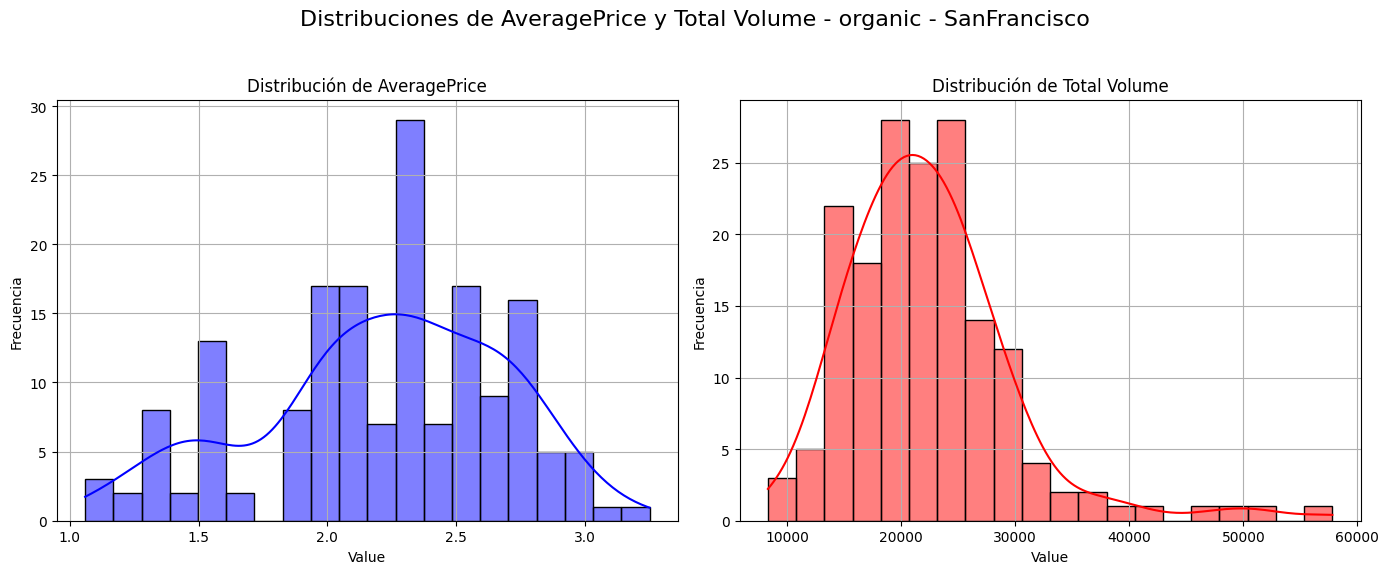

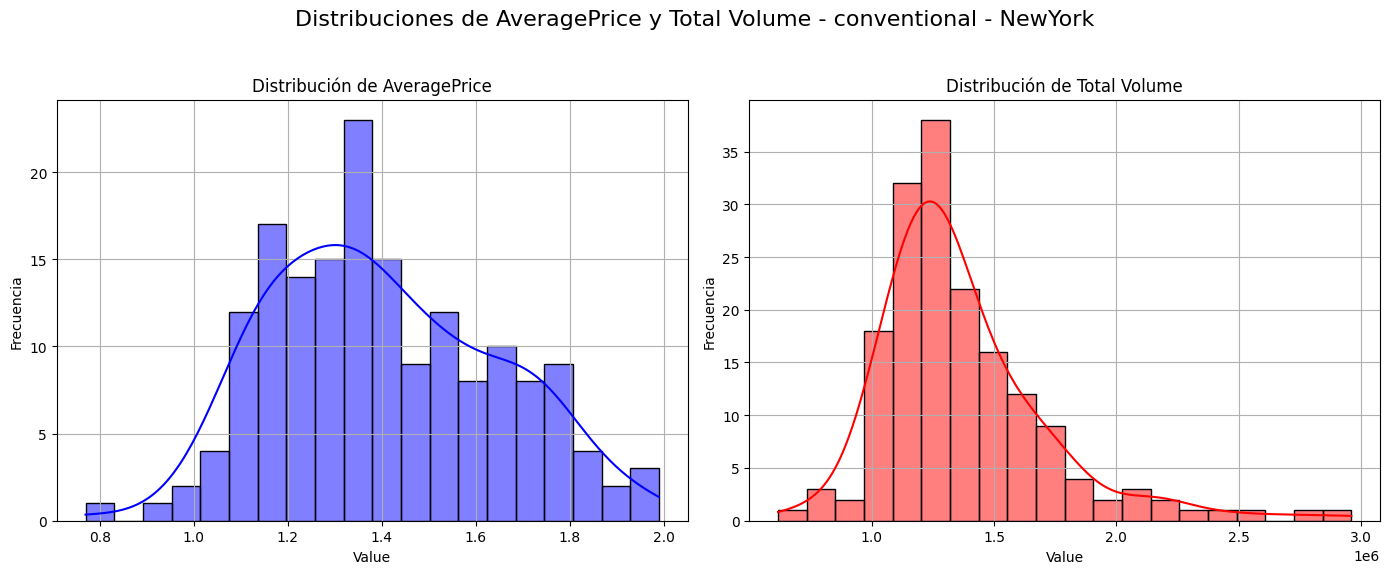

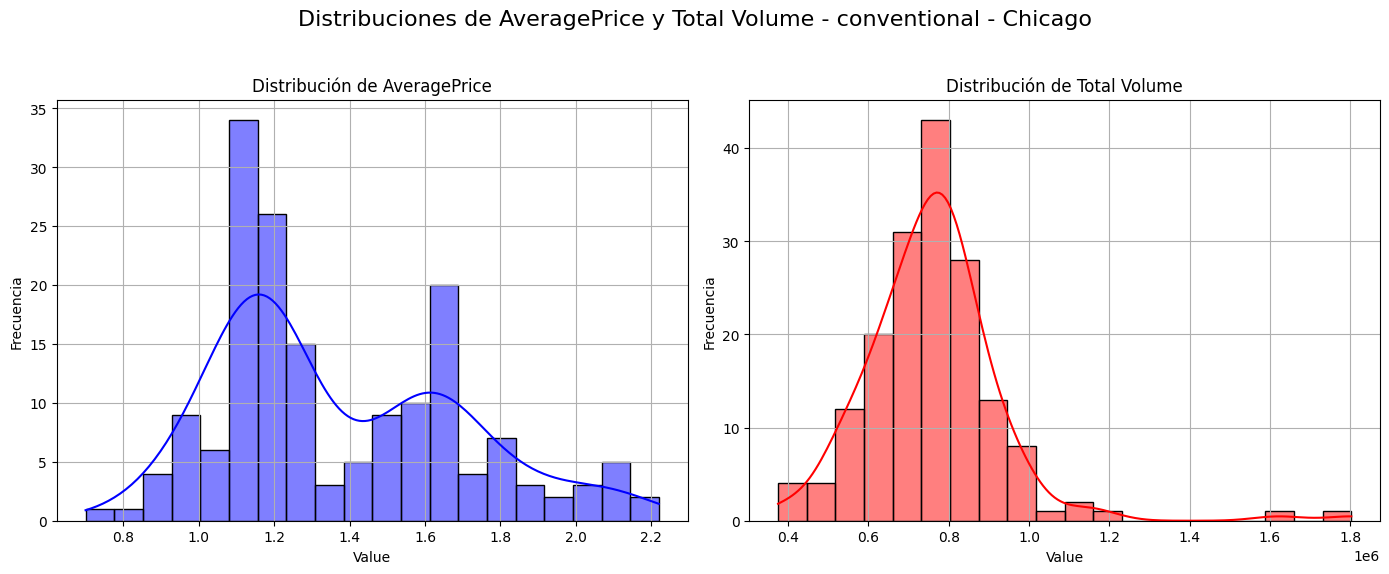

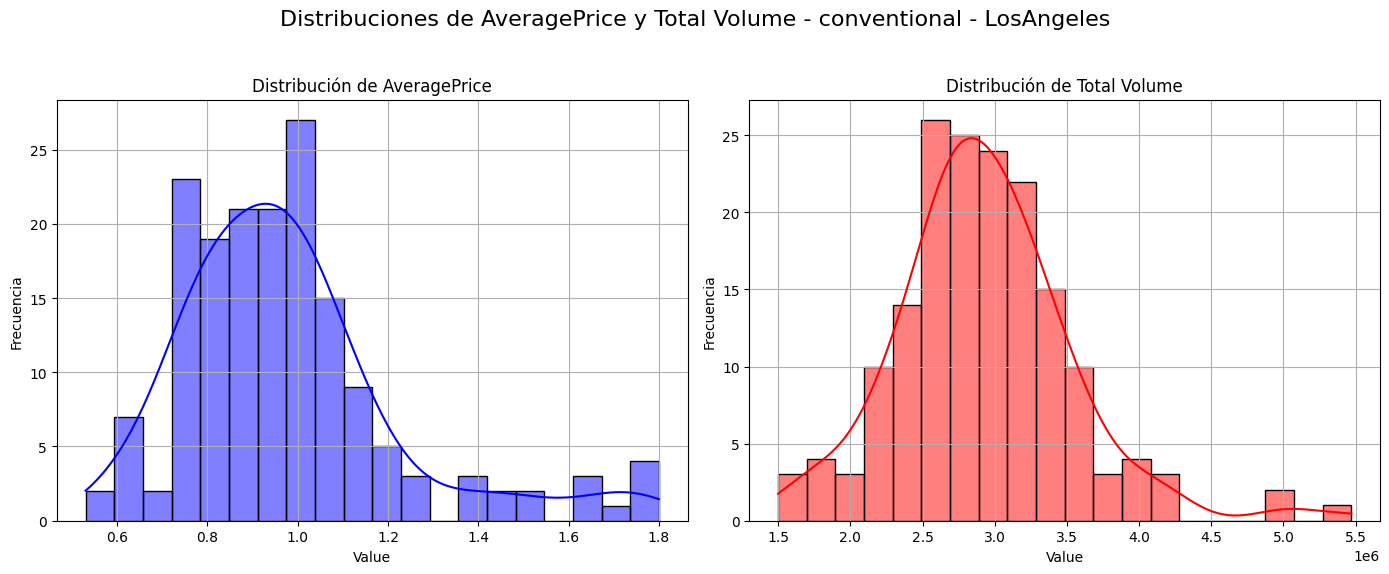

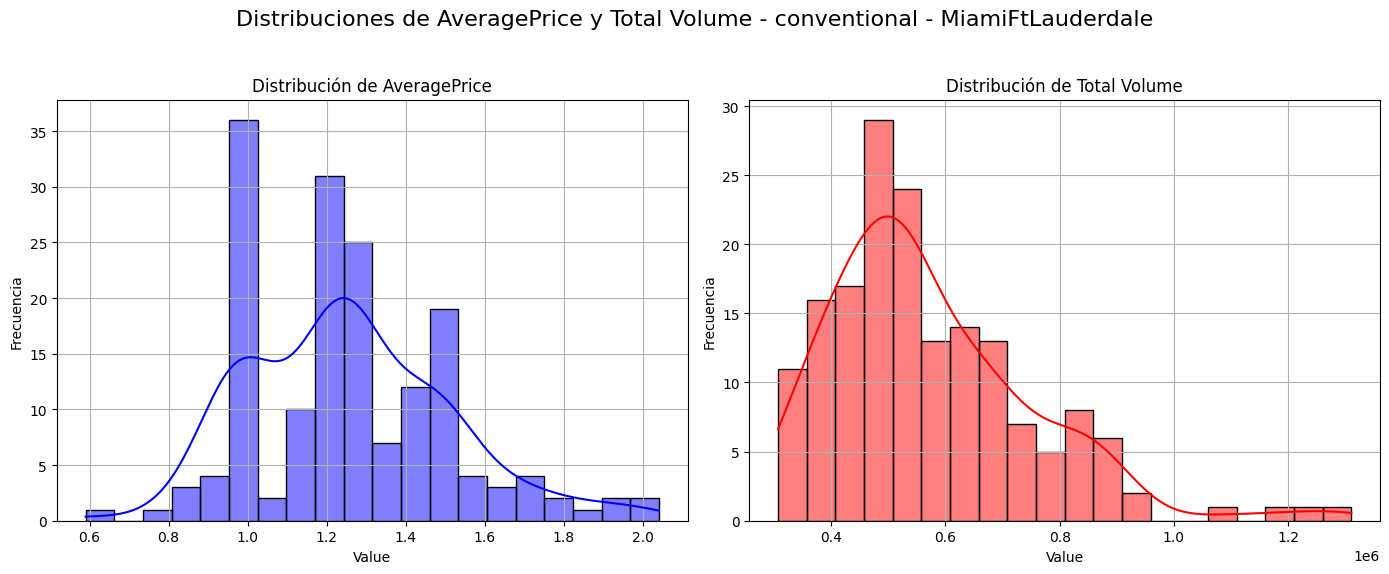

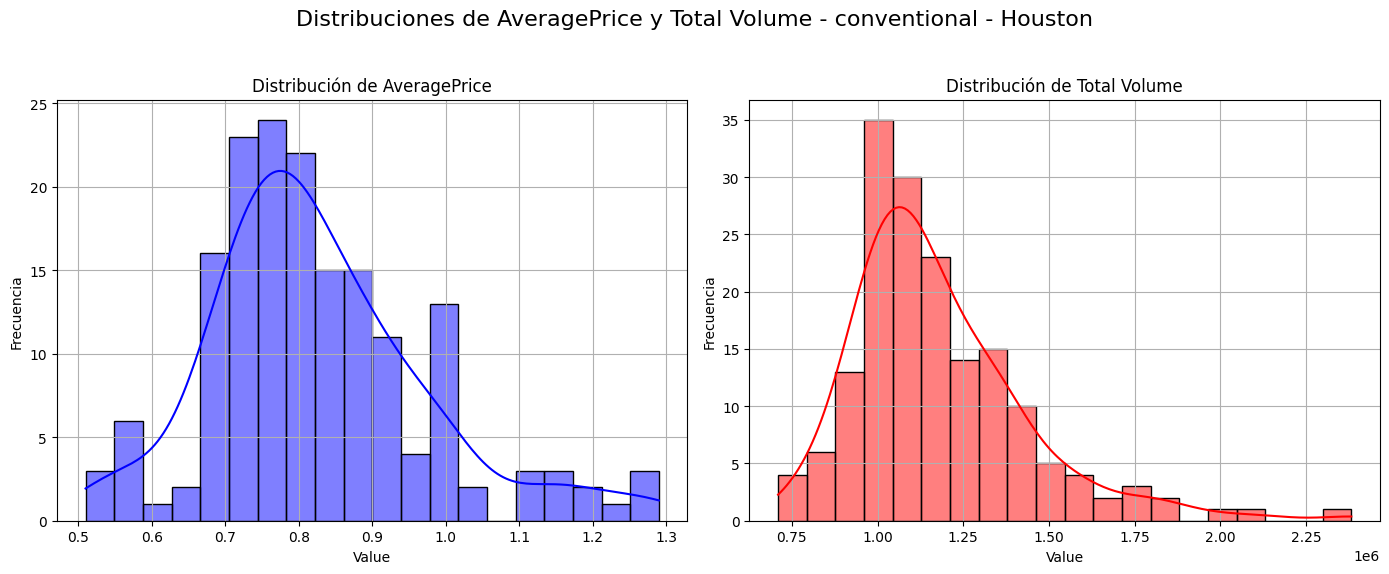

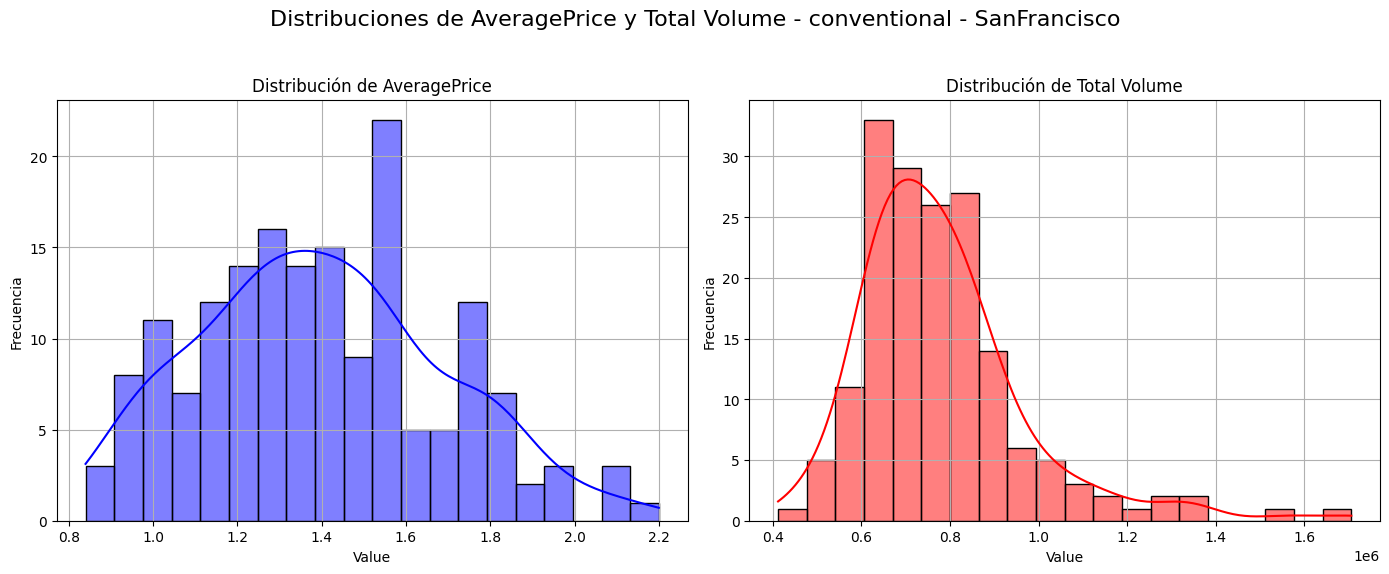

In [58]:
graficar_histograma(df, ciudades_principales)

In [66]:
# Análisis de elasticidad preliminar

def elasticidad_preliminar(df, cities, column_type='type', column_city='region', column_price='AveragePrice', column_volume='Total Volume'):
    
    """
    Grafica un scatterplot de la relación entre los cambios porcentuales en Average Price y Total Volume,
    distinguiendo por ciudad y tipo.
    
    Args:
    df (pd.DataFrame): DataFrame con los datos.
    cities (list): Lista de ciudades a incluir en los gráficos.
    column_type (str): Nombre de la columna que contiene las categorías de tipo.
    column_city (str): Nombre de la columna que contiene las ciudades.
    column_price (str): Nombre de la columna que contiene los precios (AveragePrice).
    column_volume (str): Nombre de la columna que contiene el volumen (Total Volume).
    
    Returns:
    None
    """
    
    # Obtener los tipos únicos en la columna 'type'
    tipos = df[column_type].unique()
    
    for tipo in tipos:
        for city in cities:
            # Filtrar el DF por el tipo y la ciudad
            df_filtrado = df[(df[column_type] == tipo) & (df[column_city] == city)].copy()
            
            # Calcular cambios porcentuales
            df_filtrado['price_pct_change'] = df_filtrado[column_price].pct_change()
            df_filtrado['volume_pct_change'] = df_filtrado[column_volume].pct_change()
            
            # Eliminar filas con valores NaN
            df_filtrado = df_filtrado.dropna(subset=['price_pct_change', 'volume_pct_change'])
            
            # Crear el gráfico de correlación cruzada
            plt.figure(figsize=(10,6))
            sns.scatterplot(x='price_pct_change', y='volume_pct_change', data=df_filtrado)
            plt.title(f'Relación entre cambios en precio y volumen - {tipo} - {city}')
            plt.xlabel('Cambio porcentual en precio')
            plt.ylabel('Cambio porcentual en volumen')
            plt.grid(True)
            plt.show()

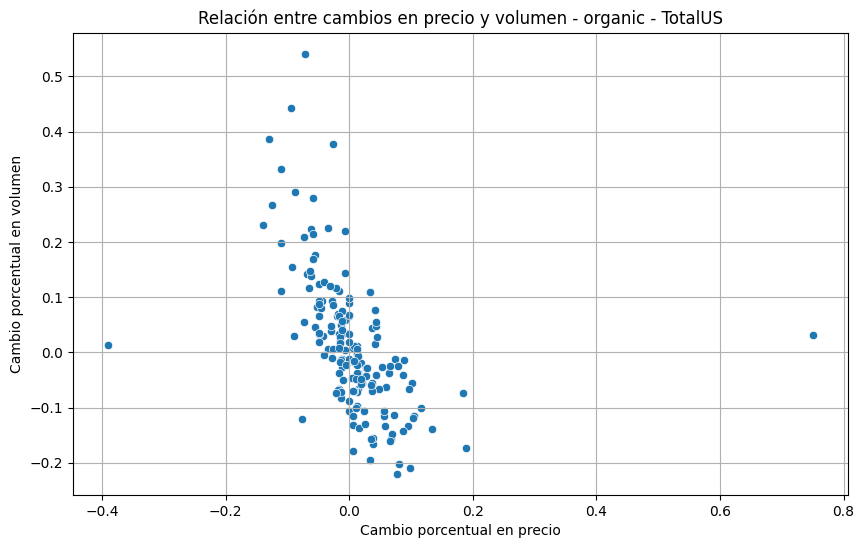

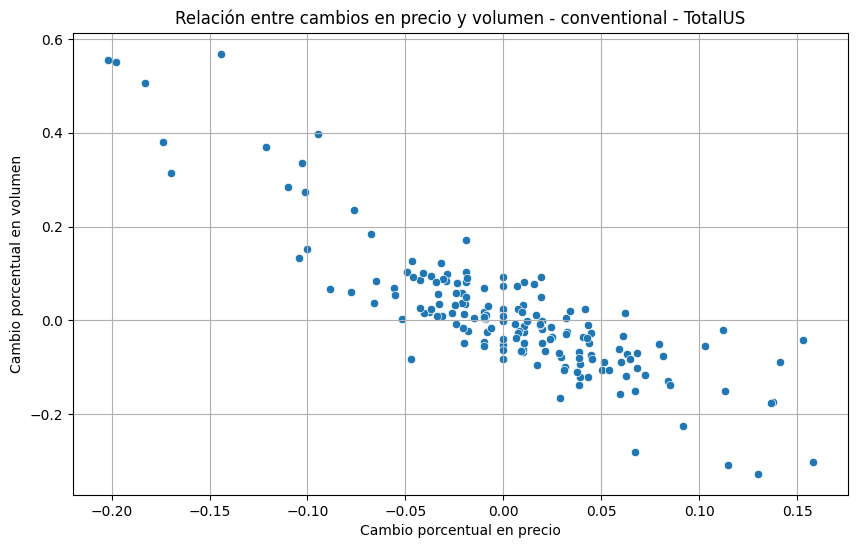

In [67]:
elasticidad_preliminar(df, total_us)

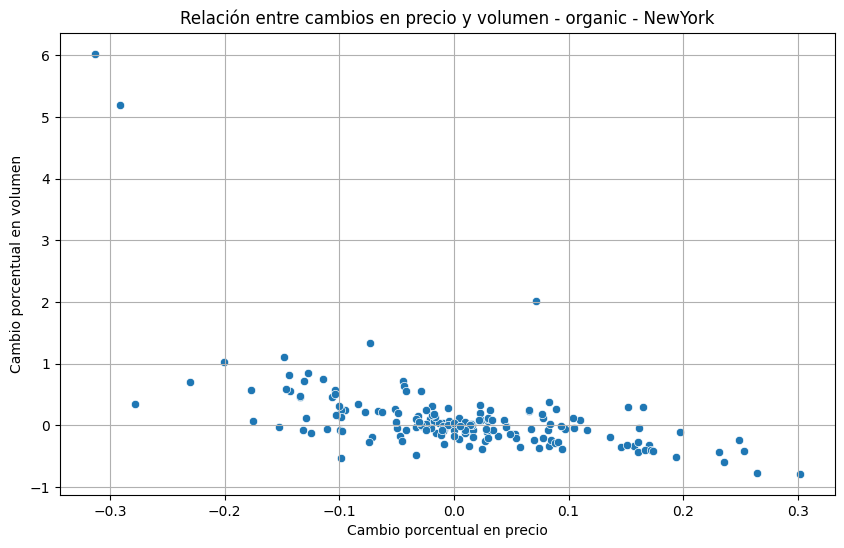

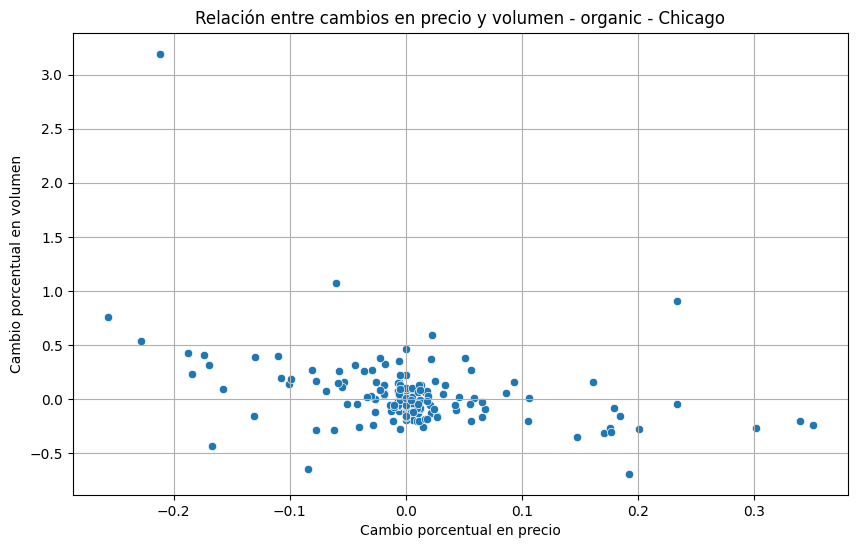

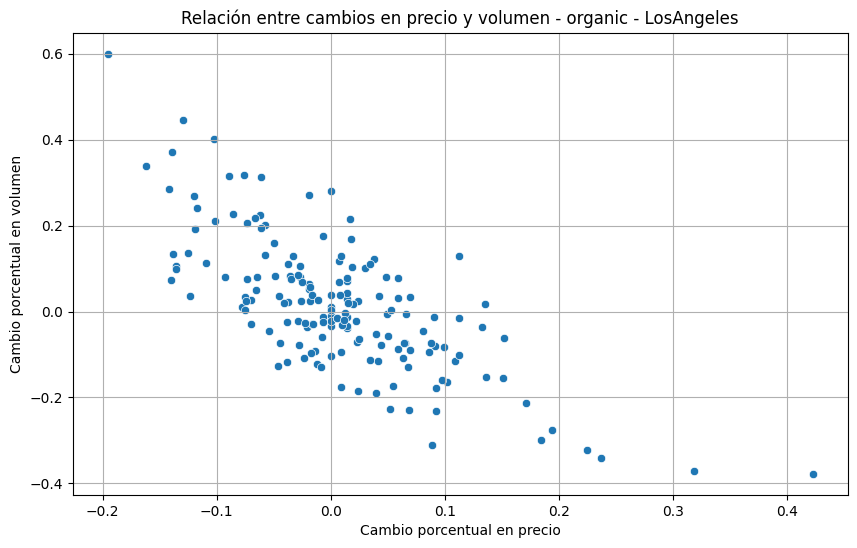

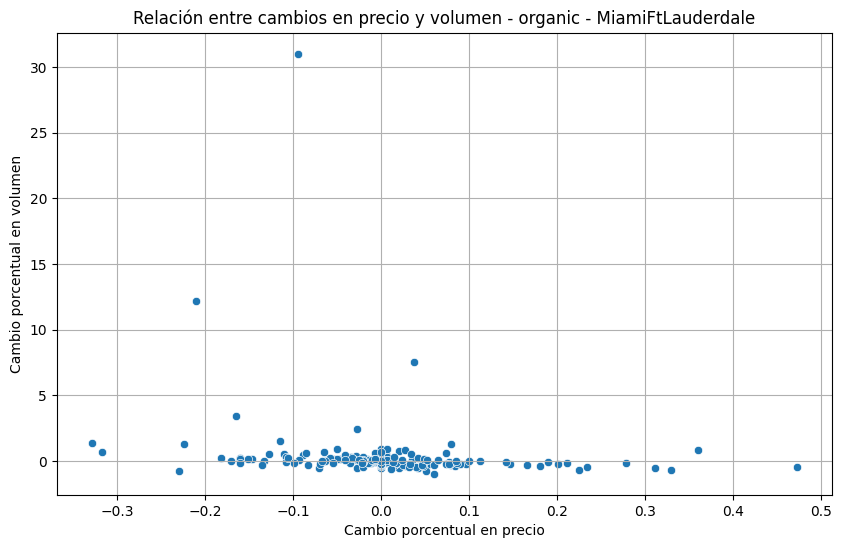

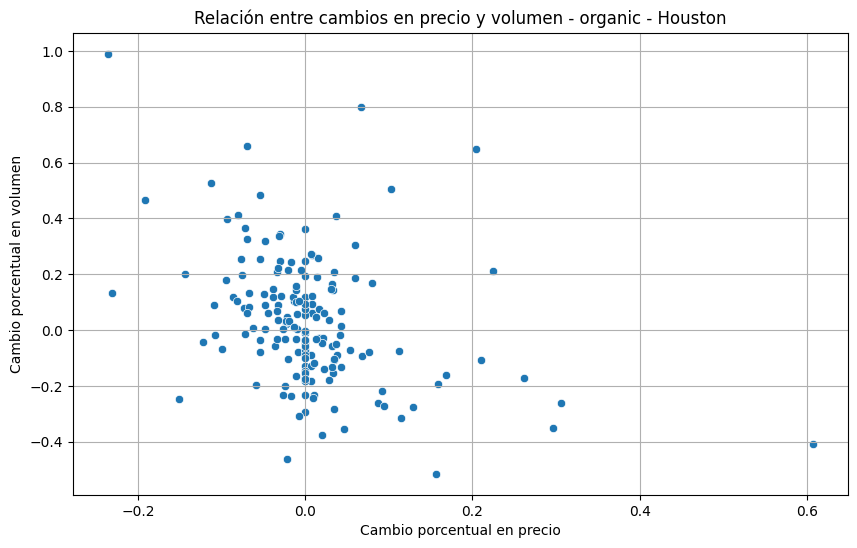

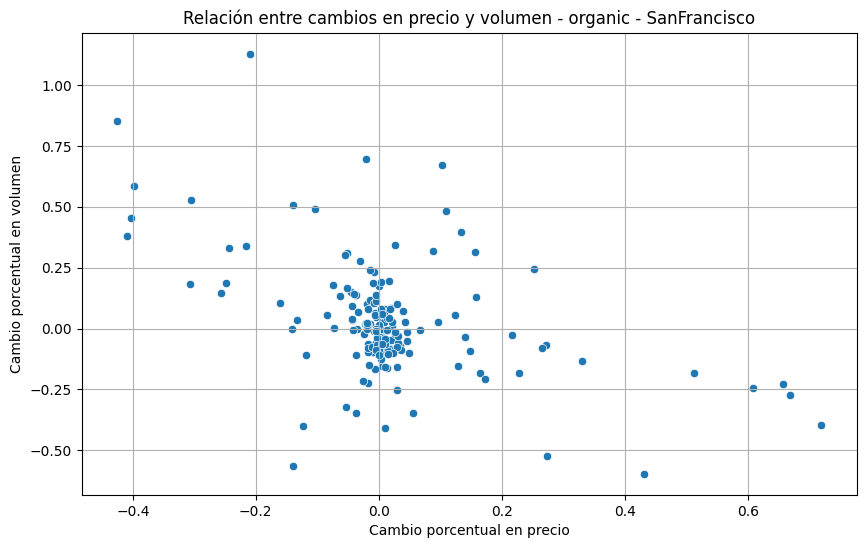

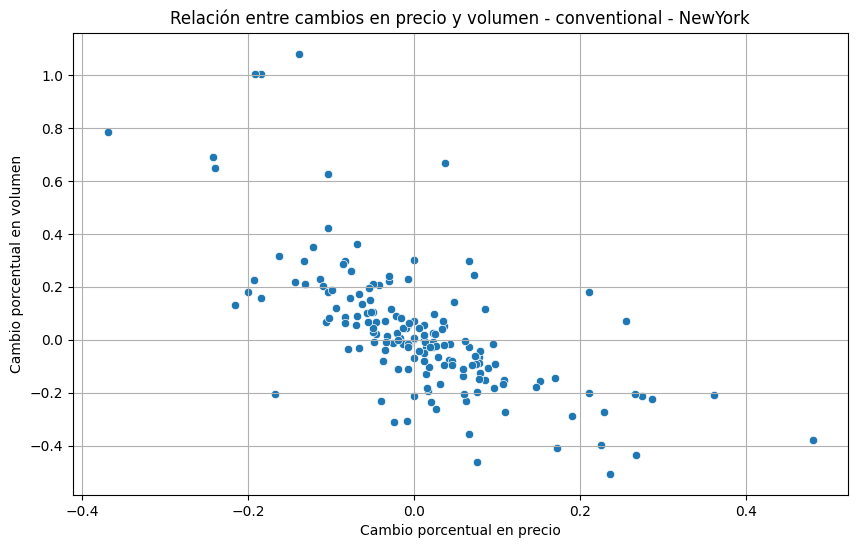

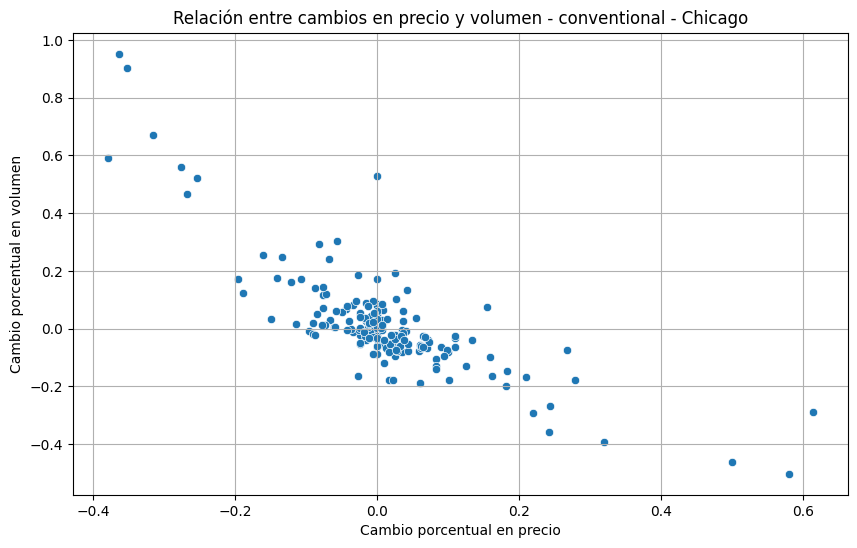

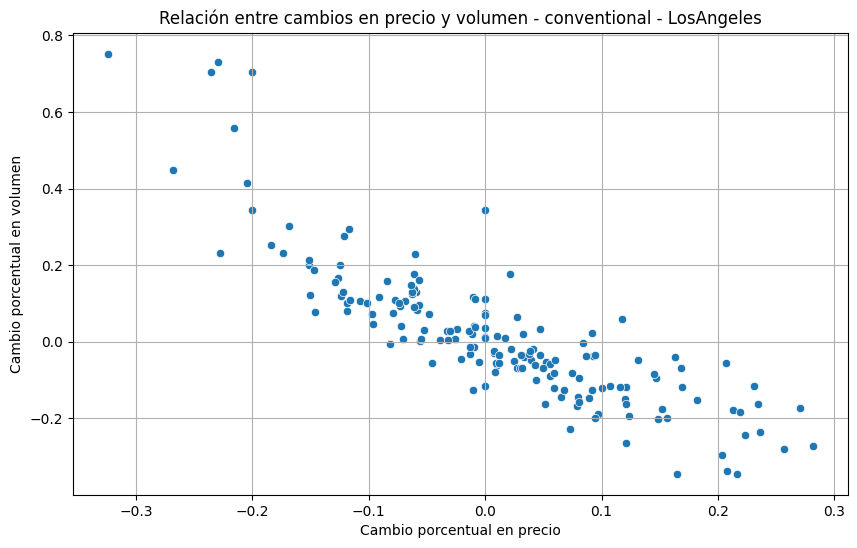

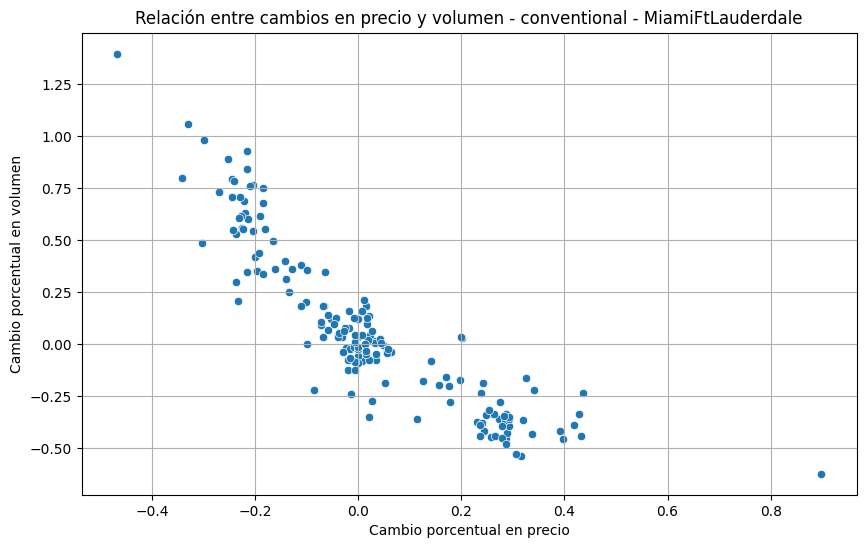

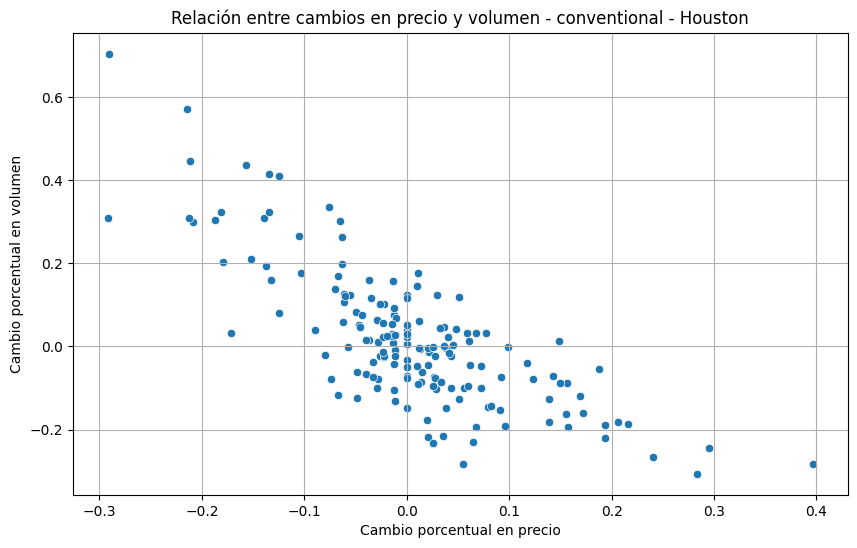

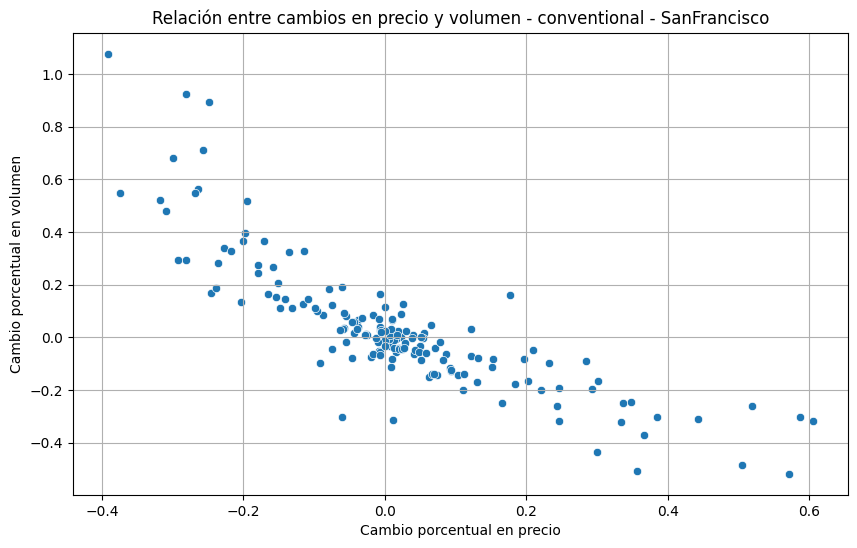

In [68]:
elasticidad_preliminar(df, ciudades_principales)